In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

In [10]:
acc = pd.read_csv("data\Cycling\QS 2024-06-04 16-15-10\Accelerometer.csv")
loc = pd.read_csv("data\Cycling\QS 2024-06-04 16-15-10\Location.csv")

In [5]:
acc = acc[(acc["Time (s)"] > 5) & (acc["Time (s)"] < max(acc["Time (s)"]) - 5)]
loc = loc[(loc["Time (s)"] > 5) & (loc["Time (s)"] < max(loc["Time (s)"]) - 5)]

In [6]:
loc = loc[(np.abs(stats.zscore(loc)) < 3).all(axis=1)]
acc = acc[(np.abs(stats.zscore(acc)) < 3).all(axis=1)]

In [7]:
x = pd.merge_asof(loc, acc, on="Time (s)", direction="nearest")
x.head()

,Time (s),Latitude (°),Longitude (°),Height (m),Velocity (m/s),Direction (°),Horizontal Accuracy (m),Vertical Accuracy (m),Acceleration x (m/s^2),Acceleration y (m/s^2),Acceleration z (m/s^2)
0,6.428335,52.341825,4.881318,-9.764151,3.96,105.199997,5.767728,7.752633,-9.138788,-0.961915,5.036592
1,7.429103,52.341810,4.881354,-10.567862,3.90,108.199997,5.669216,7.602097,-5.834300,-10.921142,2.912962
2,8.432690,52.341801,4.881406,-3.762365,4.27,113.500000,5.304637,7.096403,-5.809175,-10.068399,5.510970
3,10.434891,52.341739,4.881497,-2.032176,4.76,131.399994,4.331667,5.399944,-6.177969,-7.245168,4.661518
4,11.433171,52.341714,4.881558,-2.366588,5.20,124.099998,3.980693,4.694923,-4.584947,-4.162315,4.843671


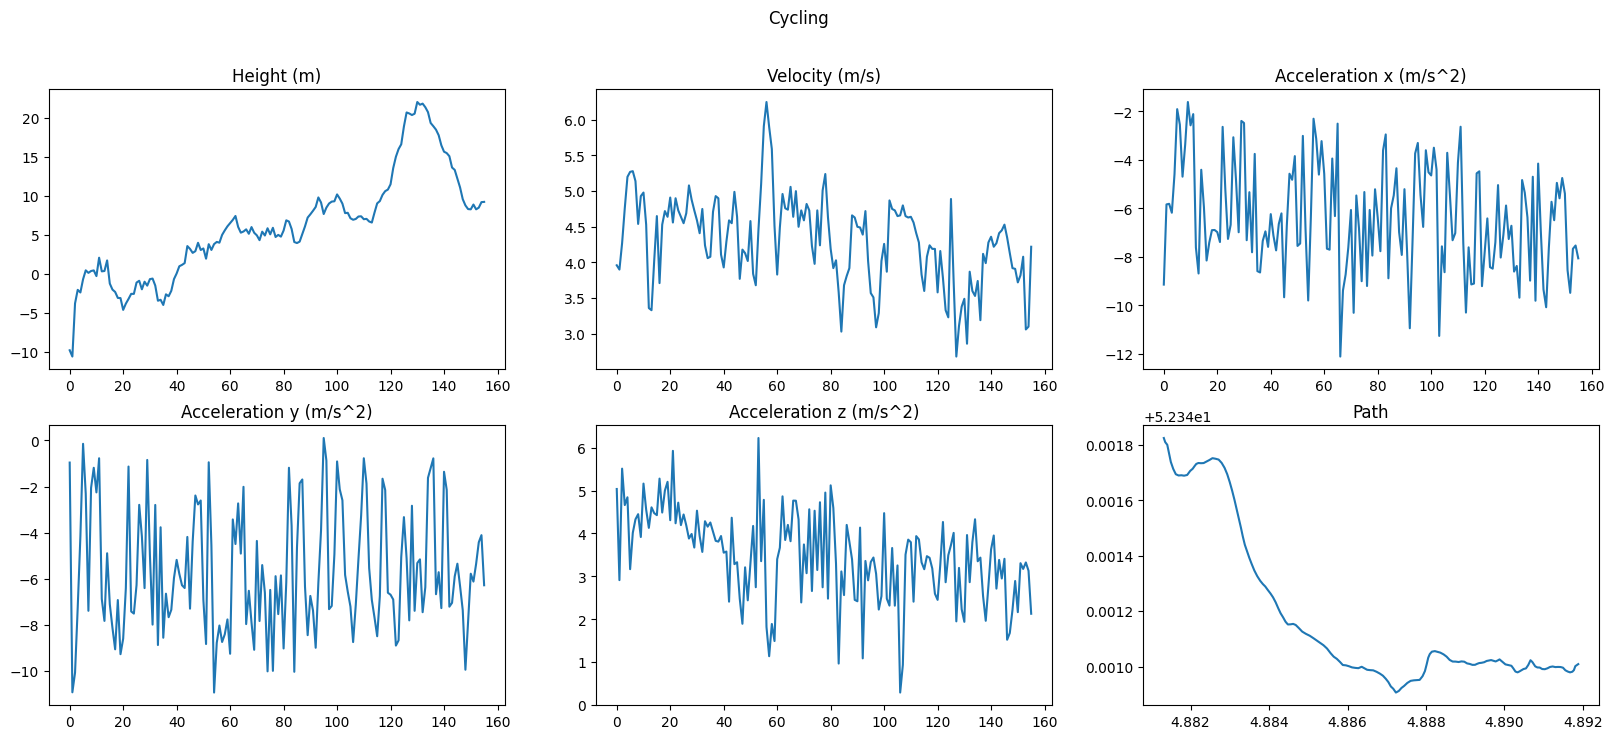

In [8]:
fig, ax = plt.subplots(2,3)
fig.set_size_inches(20, 8)
plt.plot(x['Longitude (°)'], x['Latitude (°)'])
plt.title("Path")
for i, c in enumerate(x.columns[3:5].append(x.columns[8:])):
    x[c].plot(ax=ax.flatten()[i])
    ax.flatten()[i].set_title(c)

plt.suptitle("Cycling")
plt.show()    

In [12]:
from src.OutlierDetection import DistributionBasedOutlierDetection

def remove_outliers(df, col):
    OutlierDistr = DistributionBasedOutlierDetection()
    df = OutlierDistr.chauvenet(df, col, 2)
    print(df)
    return df

acc = remove_outliers(acc, "Acceleration x (m/s^2)")

        Time (s)  Acceleration x (m/s^2)  Acceleration y (m/s^2)  \
0       0.000000               -2.393122                5.952744   
1       0.009794               -2.460121                5.998208   
2       0.049794               -2.088934                6.132505   
3       0.089794               -2.510370                6.115756   
4       0.129794               -2.510370                6.115756   
...          ...                     ...                     ...   
4346  173.809794               -1.705484                6.230611   
4347  173.849794               -1.427618                6.842875   
4348  173.889794               -1.730609                6.018547   
4349  173.929794               -1.159323                6.926623   
4350  173.969794               -2.733202                6.519245   

      Acceleration z (m/s^2)  Acceleration y (m/s^2)_outlier  \
0                   7.809276                           False   
1                  10.561620                           